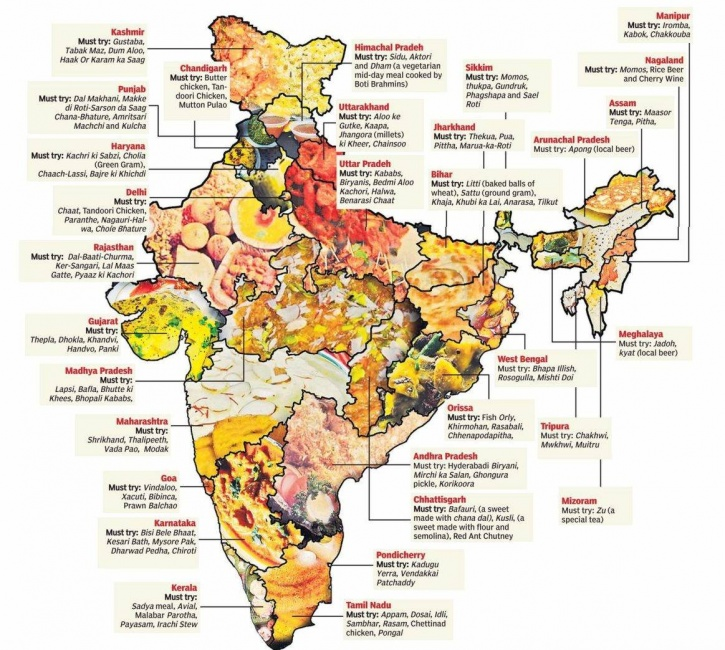

### Content
Indian cuisine consists of a variety of regional and traditional cuisines native to the Indian subcontinent. Given the diversity in soil, climate, culture, ethnic groups, and occupations, these cuisines vary substantially and use locally available spices, herbs, vegetables, and fruits. Indian food is also heavily influenced by religion, in particular Hinduism, cultural choices and traditions.

This dataset consists of information about various Indian dishes, their ingredients, their place of origin, etc.

### Column Description
name : name of the dish

ingredients : main ingredients used

diet : type of diet - either vegetarian or non vegetarian

prep_time : preparation time

cook_time : cooking time

flavor_profile : flavor profile includes whether the dish is spicy, sweet, bitter, etc

course : course of meal - starter, main course, dessert, etc

state : state where the dish is famous or is originated

region : region where the state belongs

Presence of -1 in any of the columns indicates NaN value.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('indian_food.csv')
df.head()

name                                        ingredients  \
0      Balu shahi                    Maida flour, yogurt, oil, sugar   
1          Boondi                            Gram flour, ghee, sugar   
2  Gajar ka halwa       Carrots, milk, sugar, ghee, cashews, raisins   
3          Ghevar  Flour, ghee, kewra, milk, clarified butter, su...   
4     Gulab jamun  Milk powder, plain flour, baking powder, ghee,...   

         diet  prep_time  cook_time flavor_profile   course        state  \
0  vegetarian         45         25          sweet  dessert  West Bengal   
1  vegetarian         80         30          sweet  dessert    Rajasthan   
2  vegetarian         15         60          sweet  dessert       Punjab   
3  vegetarian         15         30          sweet  dessert    Rajasthan   
4  vegetarian         15         40          sweet  dessert  West Bengal   

  region  
0   East  
1   West  
2  North  
3   West  
4   East

In [3]:
df.shape

(255, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [5]:
df.dtypes

name              object
ingredients       object
diet              object
prep_time          int64
cook_time          int64
flavor_profile    object
course            object
state             object
region            object
dtype: object

In [6]:
df.isna().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

# Duplication Check

In [7]:
df[df.duplicated('name')]

Empty DataFrame
Columns: [name, ingredients, diet, prep_time, cook_time, flavor_profile, course, state, region]
Index: []

##### Presence of -1 in any of the columns indicates NaN value.

In [8]:
df.columns

Index(['name', 'ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region'],
      dtype='object')

In [9]:
df[df['prep_time']==-1].shape

(30, 9)

In [10]:
for col in df.columns:
    df[col] = df[col].replace(-1,np.nan)
    df[col] = df[col].replace('-1',np.nan)
    

In [11]:
#df.replace(-1,np.nan)

In [12]:
df.isna().sum()

name               0
ingredients        0
diet               0
prep_time         30
cook_time         28
flavor_profile    29
course             0
state             24
region            14
dtype: int64

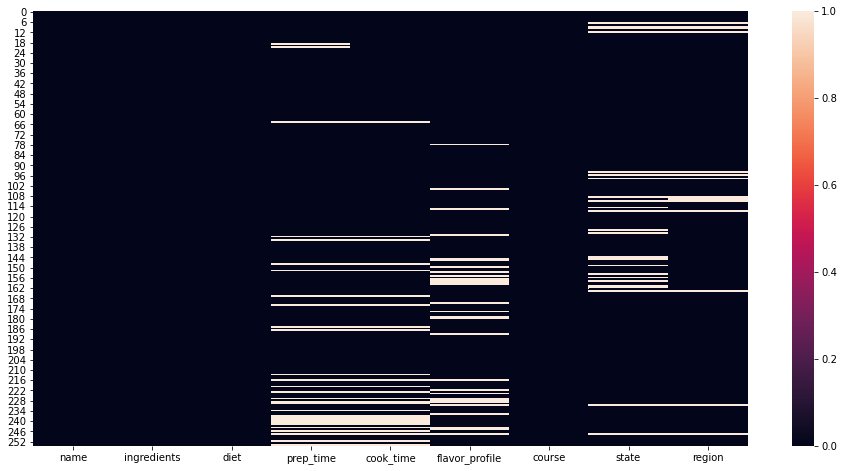

In [13]:
plt.figure(figsize=(16,8))
sns.heatmap(df.isna())
plt.show()

In [14]:
df['prep_time'].mean()

35.38666666666666

In [15]:
df['prep_time'].min()

5.0

In [16]:
df['prep_time'].max()

500.0

In [17]:
500/60

8.333333333333334

In [18]:
df[df['prep_time']==500]

name                                       ingredients  \
114  Pindi chana  Fennel, tea bags, tomato, kasuri methi, cinnamon   

           diet  prep_time  cook_time flavor_profile       course   state  \
114  vegetarian      500.0      120.0          spicy  main course  Punjab   

    region  
114  North

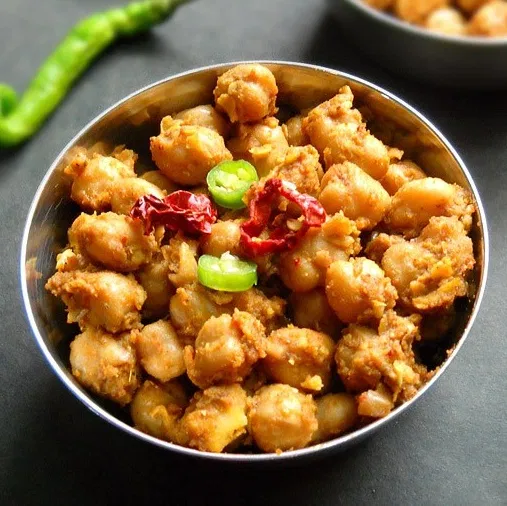

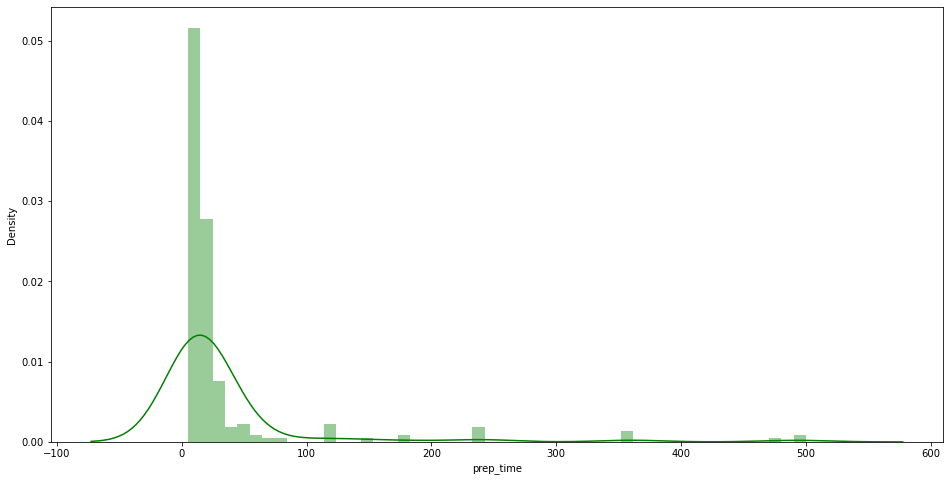

In [19]:
plt.figure(figsize=(16,8))
sns.distplot(df['prep_time'],color='g')
plt.show()

In [20]:
df['prep_time'].fillna(value=35.38,inplace=True)

In [21]:
df.isna().sum()

name               0
ingredients        0
diet               0
prep_time          0
cook_time         28
flavor_profile    29
course             0
state             24
region            14
dtype: int64

In [22]:
df['cook_time'].mean()

38.91189427312775

In [23]:
df['cook_time'].min()

2.0

In [24]:
df['cook_time'].max()

720.0

In [25]:
720/60

12.0

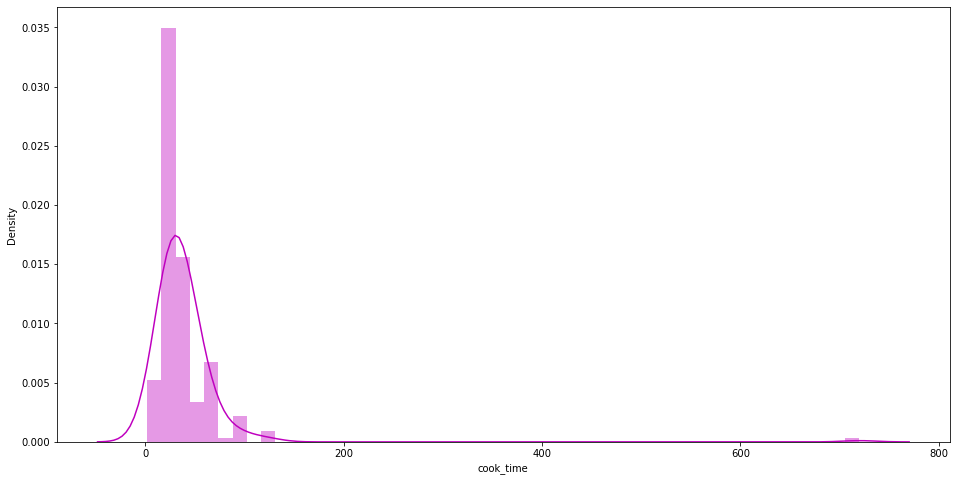

In [26]:
plt.figure(figsize=(16,8))
sns.distplot(df['cook_time'],color='m')
plt.show()

In [27]:
df[df['cook_time']==2]

name                                    ingredients        diet  \
109  Pani puri  Kala chana, mashed potato, boondi, sev, lemon  vegetarian   

     prep_time  cook_time flavor_profile course state region  
109       15.0        2.0          spicy  snack   NaN    NaN

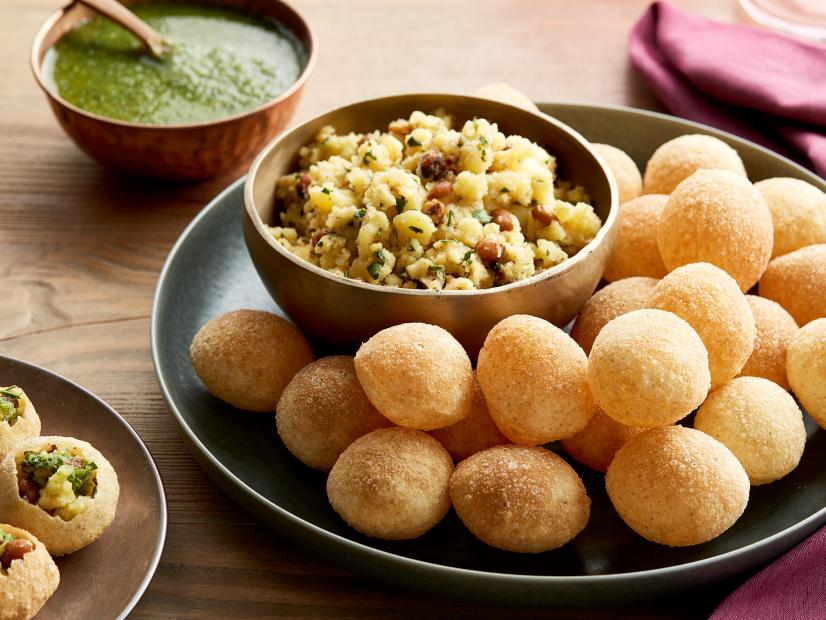

In [28]:
df[df['cook_time']==720]

name                     ingredients        diet  prep_time  \
62  Shrikhand  Curd, sugar, saffron, cardamom  vegetarian       10.0   

    cook_time flavor_profile   course        state region  
62      720.0          sweet  dessert  Maharashtra   West

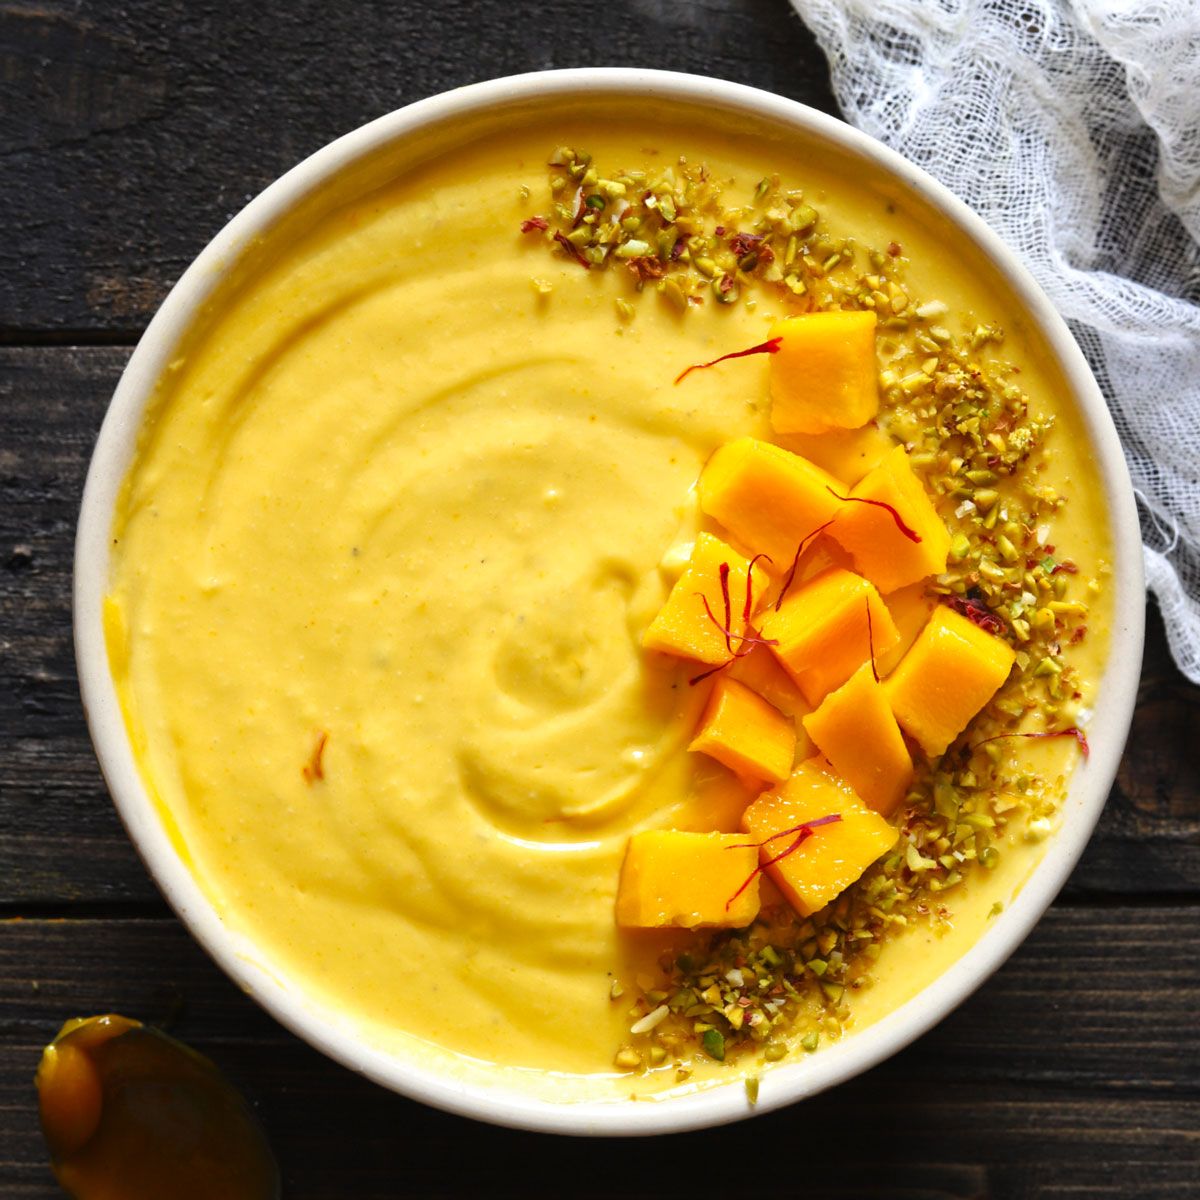

In [29]:
df['cook_time'].fillna(value=38.9,inplace=True)

In [30]:
df.isna().sum()

name               0
ingredients        0
diet               0
prep_time          0
cook_time          0
flavor_profile    29
course             0
state             24
region            14
dtype: int64

In [31]:
df[df['region'].isna()] # How to see null values rows

name                                        ingredients  \
7        Kaju katli                     Cashews, ghee, cardamom, sugar   
9             Kheer                    Milk, rice, sugar, dried fruits   
10            Laddu                            Gram flour, ghee, sugar   
12        Nankhatai  Refined flour, besan, ghee, powdered sugar, yo...   
94          Khichdi  Moong dal, green peas, ginger, tomato, green c...   
96    Kulfi falooda  Rose syrup, falooda sev, mixed nuts, saffron, ...   
98   Lauki ki subji  Bottle gourd, coconut oil, garam masala, ginge...   
109       Pani puri      Kala chana, mashed potato, boondi, sev, lemon   
110        Panjeeri  Whole wheat flour, musk melon seeds, poppy see...   
111           Papad       Urad dal, sev, lemon juice, chopped tomatoes   
117          Samosa  Potatoes, green peas, garam masala, ginger, dough   
164            Upma   Chana dal, urad dal, ginger, curry leaves, sugar   
231      Brown Rice                   Brown rice, soy sauce, olive oil   
248        Red Rice  Red pepper, red onion, butter, watercress, oli...   

           diet  prep_time  cook_time flavor_profile       course  \
7    vegetarian      10.00       20.0          sweet      dessert   
9    vegetarian      10.00       40.0          sweet      dessert   
10   vegetarian      10.00       40.0          sweet      dessert   
12   vegetarian      20.00       30.0          sweet      dessert   
94   vegetarian      40.00       20.0          spicy  main course   
96   vegetarian      45.00       25.0          sweet      dessert   
98   vegetarian      10.00       20.0          spicy  main course   
109  vegetarian      15.00        2.0          spicy        snack   
110  vegetarian      10.00       25.0          sweet      dessert   
111  vegetarian       5.00        5.0          spicy        snack   
117  vegetarian      30.00       30.0          spicy        snack   
164  vegetarian      10.00       20.0          spicy        snack   
231  vegetarian      15.00       25.0            NaN  main course   
248  vegetarian      35.38       38.9            NaN  main course   

             state region  
7              NaN    NaN  
9              NaN    NaN  
10             NaN    NaN  
12             NaN    NaN  
94             NaN    NaN  
96             NaN    NaN  
98             NaN    NaN  
109            NaN    NaN  
110  Uttar Pradesh    NaN  
111            NaN    NaN  
117            NaN    NaN  
164            NaN    NaN  
231            NaN    NaN  
248            NaN    NaN

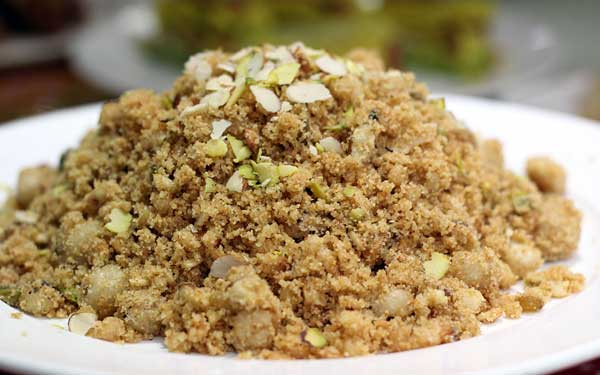

In [32]:
df['region'].value_counts()

West          74
South         59
North         49
East          31
North East    25
Central        3
Name: region, dtype: int64

In [33]:
df[df['flavor_profile'].isna()] # How to see null values rows

name                                        ingredients  \
78          Chapati  Whole wheat flour, olive oil, hot water, all p...   
104            Naan           Whole wheat flour, honey, butter, garlic   
116           Rongi  Garam masala powder, tomato, kasuri methi, cin...   
131           Kanji     Carrot, yellow mustard, red chilli, black salt   
145         Pachadi  Coconut oil, cucumber, curd, curry leaves, mus...   
146       Paniyaram  Yogurt, ginger, curry leaves, baking soda, gre...   
150   Paruppu sadam  Arhar dal, sambar powder, tomato, curry leaves...   
153      Puli sadam  Urad dal, lemon, tamarind, cooked rice, curry ...   
155           Puttu            Brown rice flour, sugar, grated coconut   
157         Sandige  Thin rice flakes, black sesame seeds, curry le...   
158           Sevai                     Sevai, parboiled rice, steamer   
159    Thayir sadam  Urad dal, curd, sesame oil, ginger, curry leav...   
160         Theeyal  Coconut, whole red beans, masala, sesame oil, ...   
171          Bhakri                          Jowar flour, sesame seeds   
176      Copra paak  Condensed milk, nestle cream, coconut ice, red...   
179       Dahi vada  Urad dal, bhuna chana, garam masala, dates, ta...   
180        Dalithoy  Arhar dal, coconut oil, curry leaves, mustard ...   
189          Kansar                 Wheat flour, cashews, rapeseed oil   
216      Farsi Puri  Semolina, clarified butter, oil, white flour, ...   
222            Khar  Raw papaya, panch phoran masala, nigella seeds...   
224           Luchi                               Maida, vegetable oil   
227  Bengena Pitika     Brinjal, onions, salt, sesame seeds, coriander   
228     Bilahi Maas  Potatoes, garam masala, tomatoes, mustard oil,...   
229      Black rice  Forbidden black rice, chicken, olive oil, sliv...   
231      Brown Rice                   Brown rice, soy sauce, olive oil   
236   Chingri Bhape   Coconut, prawns, curd, mustard seed, green chili   
244         Pakhala        Curd, cooked rice, curry leaves, dry chilli   
245      Pani Pitha  Tea leaves, white sesame seeds, dry coconut, s...   
248        Red Rice  Red pepper, red onion, butter, watercress, oli...   

               diet  prep_time  cook_time flavor_profile       course  \
78       vegetarian      10.00       10.0            NaN  main course   
104      vegetarian      60.00       30.0            NaN  main course   
116      vegetarian      10.00       30.0            NaN  main course   
131      vegetarian      10.00       45.0            NaN        snack   
145      vegetarian      10.00       25.0            NaN  main course   
146      vegetarian      10.00       20.0            NaN  main course   
150      vegetarian      10.00       20.0            NaN  main course   
153      vegetarian      10.00       20.0            NaN  main course   
155      vegetarian     495.00       40.0            NaN  main course   
157      vegetarian     120.00       60.0            NaN  main course   
158      vegetarian     120.00       30.0            NaN  main course   
159      vegetarian      10.00       20.0            NaN  main course   
160      vegetarian      15.00       20.0            NaN  main course   
171      vegetarian      20.00       25.0            NaN  main course   
176      vegetarian      20.00       30.0            NaN  main course   
179      vegetarian      30.00       30.0            NaN        snack   
180      vegetarian       5.00       20.0            NaN  main course   
189      vegetarian      10.00       40.0            NaN  main course   
216      vegetarian      35.38       38.9            NaN        snack   
222      vegetarian      10.00       20.0            NaN  main course   
224      vegetarian      20.00       30.0            NaN  main course   
227      vegetarian      35.38       38.9            NaN  main course   
228  non vegetarian      10.00       20.0            NaN  main course   
229  non vegetarian      35.38       38.9 

# Veg vs Non-veg

vegetarian        226
non vegetarian     29
Name: diet, dtype: int64

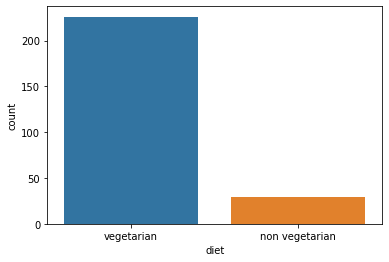

In [34]:
sns.countplot(df['diet'])
df['diet'].value_counts()

spicy     133
sweet      88
bitter      4
sour        1
Name: flavor_profile, dtype: int64

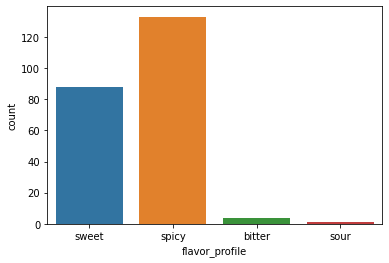

In [35]:
sns.countplot(df['flavor_profile'])
df['flavor_profile'].value_counts()

main course    129
dessert         85
snack           39
starter          2
Name: course, dtype: int64

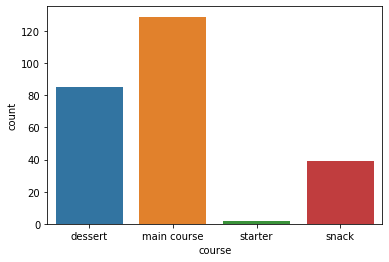

In [36]:
sns.countplot(df['course'])
df['course'].value_counts()

Gujarat            35
Punjab             32
Maharashtra        30
West Bengal        24
Assam              21
Tamil Nadu         20
Andhra Pradesh     10
Uttar Pradesh       9
Kerala              8
Odisha              7
Karnataka           6
Rajasthan           6
Telangana           5
Bihar               3
Goa                 3
Jammu & Kashmir     2
Manipur             2
Madhya Pradesh      2
Chhattisgarh        1
Haryana             1
Uttarakhand         1
NCT of Delhi        1
Tripura             1
Nagaland            1
Name: state, dtype: int64

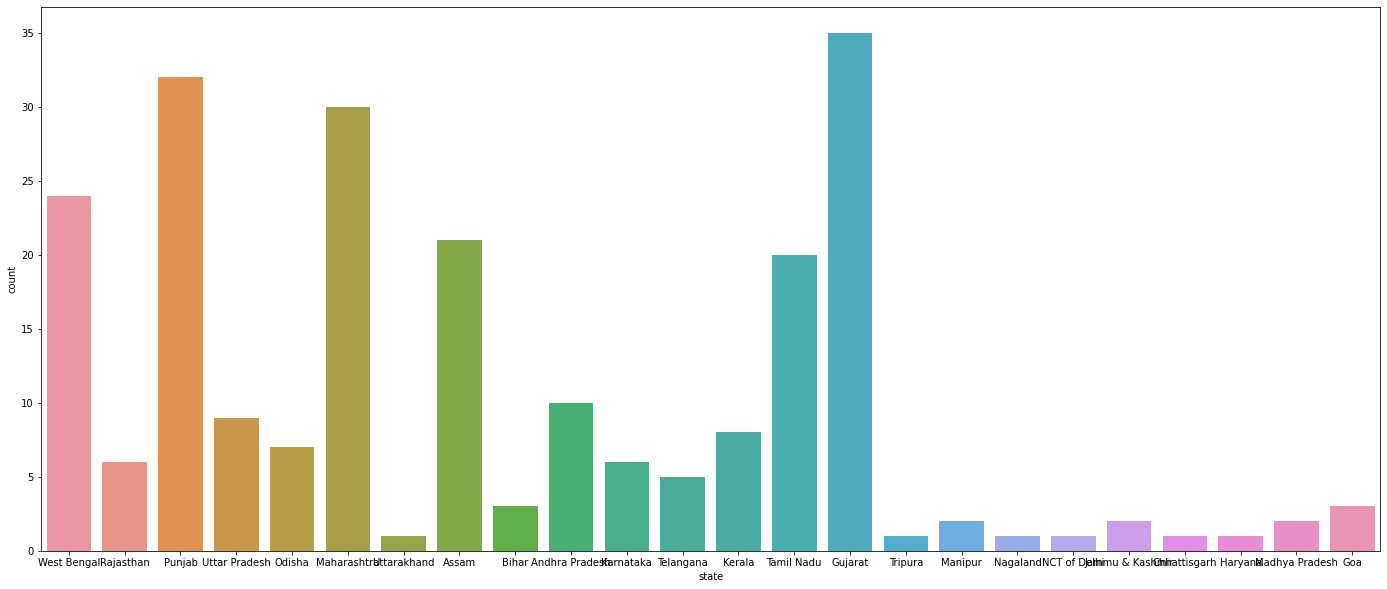

In [37]:
plt.figure(figsize=(24,10))
sns.countplot(df['state'])
df['state'].value_counts()

In [38]:
state_reciepies = df.groupby('state')

In [39]:
state_reciepies['diet'].value_counts()

state            diet          
Andhra Pradesh   vegetarian        10
Assam            vegetarian        11
                 non vegetarian    10
Bihar            vegetarian         3
Chhattisgarh     vegetarian         1
Goa              vegetarian         2
                 non vegetarian     1
Gujarat          vegetarian        35
Haryana          vegetarian         1
Jammu & Kashmir  vegetarian         2
Karnataka        vegetarian         6
Kerala           vegetarian         7
                 non vegetarian     1
Madhya Pradesh   vegetarian         2
Maharashtra      vegetarian        28
                 non vegetarian     2
Manipur          non vegetarian     1
                 vegetarian         1
NCT of Delhi     non vegetarian     1
Nagaland         non vegetarian     1
Odisha           vegetarian         7
Punjab           vegetarian        28
                 non vegetarian     4
Rajasthan        vegetarian         6
Tamil Nadu       vegetarian        19
                 n

In [40]:
# Andhra

In [41]:
df[df['state'] =='Andhra Pradesh']

name                                        ingredients  \
37          Ariselu                          Rice flour, jaggery, ghee   
38     Bandar laddu  Besan, jaggery, cardamom powder, ghee, cashews...   
42          Gavvalu            Rice flour, sugar, salt, ghee, semolina   
43   Kakinada khaja                                 Wheat flour, sugar   
47    Palathalikalu                                   Rice flour, milk   
48         Poornalu                                 Chana dal, jaggery   
50     Pootharekulu                   Rice flour, powdered sugar, ghee   
54        Kajjikaya                       Rice flour, jaggery, coconut   
124            Attu  Whole wheat flour, arhar dal, ginger, kala jee...   
151       Pesarattu                      Green moong beans, rice flour   

           diet  prep_time  cook_time flavor_profile   course           state  \
37   vegetarian       15.0       75.0          sweet  dessert  Andhra Pradesh   
38   vegetarian        5.0       35.0          sweet  dessert  Andhra Pradesh   
42   vegetarian       10.0       30.0          sweet  dessert  Andhra Pradesh   
43   vegetarian       10.0       30.0          sweet  dessert  Andhra Pradesh   
47   vegetarian       10.0       25.0          sweet  dessert  Andhra Pradesh   
48   vegetarian      240.0       60.0          sweet  dessert  Andhra Pradesh   
50   vegetarian       10.0       60.0          sweet  dessert  Andhra Pradesh   
54   vegetarian       40.0       15.0          sweet  dessert  Andhra Pradesh   
124  vegetarian      150.0       25.0          spicy    snack  Andhra Pradesh   
151  vegetarian      120.0       20.0          spicy    snack  Andhra Pradesh   

    region  
37   South  
38   South  
42   South  
43   South  
47   South  
48   South  
50   South  
54   South  
124  South  
151  South

In [42]:
df[df['state'] =='Telangana']

name                                        ingredients  \
41   Double ka meetha                                   Loaf bread, milk   
51   Qubani ka meetha                              Apricots, sugar syrup   
52        Sheer korma                           Vermicelli pudding, milk   
75            Biryani  Chicken thighs, basmati rice, star anise, swee...   
120       Shahi tukra  Rose water, milk, white bread slices, saffron,...   

               diet  prep_time  cook_time flavor_profile       course  \
41       vegetarian       20.0       30.0          sweet      dessert   
51       vegetarian       10.0       20.0          sweet      dessert   
52       vegetarian       10.0       20.0          sweet      dessert   
75   non vegetarian       30.0      120.0          spicy  main course   
120      vegetarian       10.0       30.0          sweet      dessert   

         state region  
41   Telangana  South  
51   Telangana  South  
52   Telangana  South  
75   Telangana  South  
120  Telangana  South

# Regions

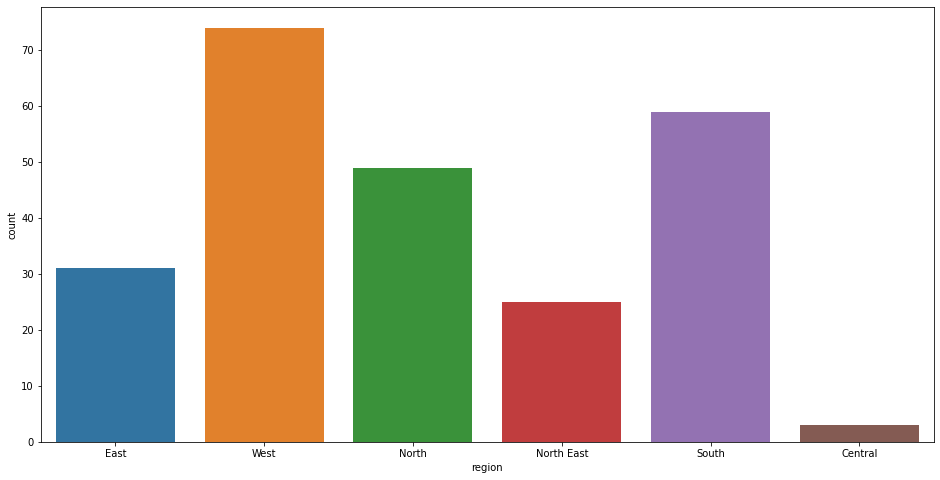

In [43]:
plt.figure(figsize=(16,8))
sns.countplot(df['region'])
plt.show()

# Region Vs Diet

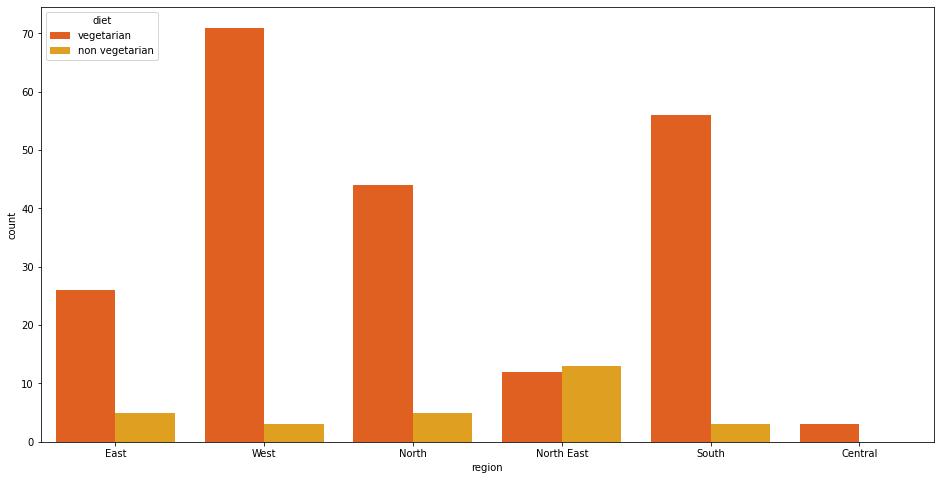

In [44]:
plt.figure(figsize=(16,8))
sns.countplot(df['region'],hue=df['diet'],palette="autumn")
plt.show()

# Region vs Course

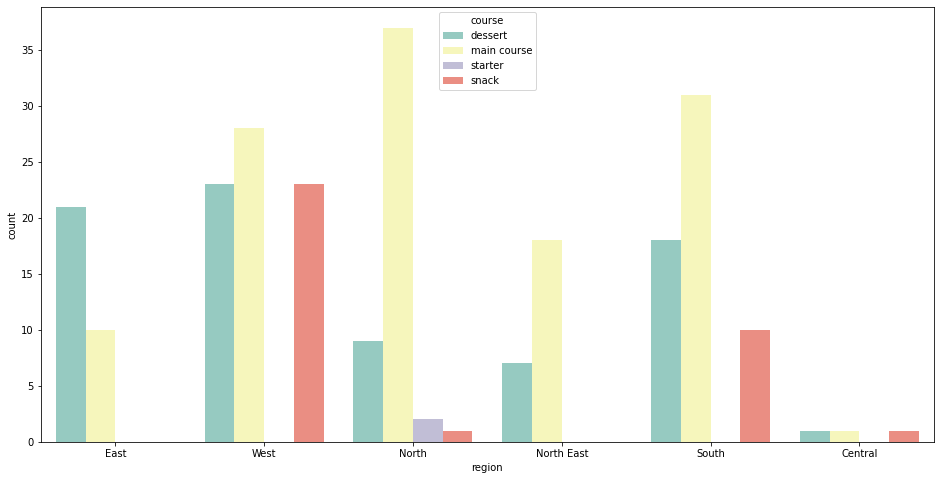

In [45]:
plt.figure(figsize=(16,8))
sns.countplot(df['region'],hue=df['course'],palette="Set3")
plt.show()

# Course vs Flavour

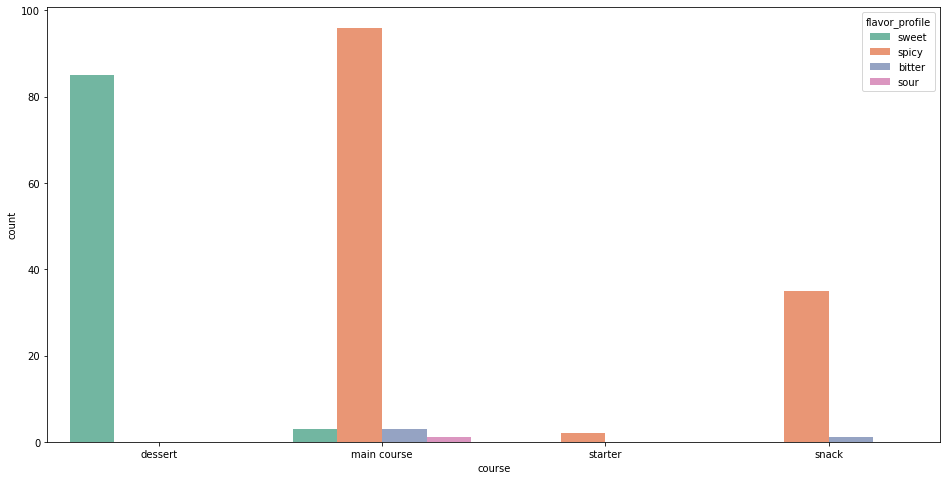

In [46]:
plt.figure(figsize=(16,8))
sns.countplot(df['course'],hue=df['flavor_profile'],palette="Set2")
plt.show()